<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-25 20:24:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-08-25 20:24:59 (165 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



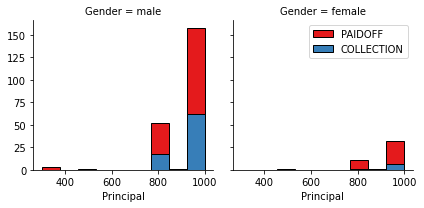

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

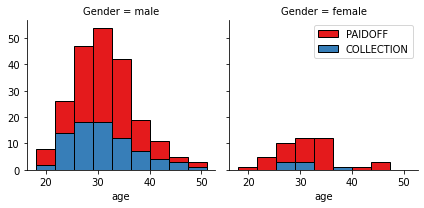

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


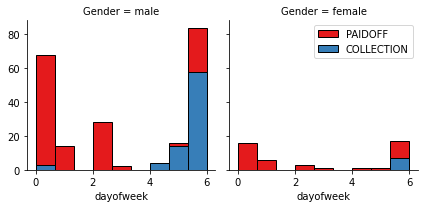

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

**Train-Test** split

In [21]:
#train test split of the data to evaluate the k-value to be used ...
x_train, x_test, y_train , y_test = train_test_split(X,y,test_size=.25,random_state = 42)
# 42, the meaning of everything ...

In [22]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(259, 8) (87, 8) (259,) (87,)


In [23]:
# let's test it with 1 to 20 (included) KNN
Ks = 20
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

for n in range(Ks):
    
    # Train Model and Predict  
    # (n+1) so n_neighbors goes from 1 to 20 (included)
    neigh = KNeighborsClassifier(n_neighbors = n + 1).fit(x_train,y_train)
    yhat  = neigh.predict(x_test)
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)

    #This std is calculated on the average of the boolean matrix for correctly classified points yhat == y_test
    std_acc[n] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    
#Let's print the results
for i,el in enumerate(mean_acc):
    print(f'For Ks {i+1 : < 5} -> Mean_accuracy = {el:.5f} +- std = {std_acc[i]:.5f}')
    
max_acc = mean_acc.max()
max_std = std_acc[mean_acc.argmax()]
Kmax = np.arange(1,Ks+1,1)[mean_acc.argmax()]
print(f'\nK(max) = {Kmax}')
print(f'Maximum accuracy value (+- std) = {max_acc} +- {max_std}')

For Ks  1    -> Mean_accuracy = 0.73563 +- std = 0.04728
For Ks  2    -> Mean_accuracy = 0.65517 +- std = 0.05096
For Ks  3    -> Mean_accuracy = 0.75862 +- std = 0.04588
For Ks  4    -> Mean_accuracy = 0.66667 +- std = 0.05054
For Ks  5    -> Mean_accuracy = 0.74713 +- std = 0.04660
For Ks  6    -> Mean_accuracy = 0.74713 +- std = 0.04660
For Ks  7    -> Mean_accuracy = 0.77011 +- std = 0.04511
For Ks  8    -> Mean_accuracy = 0.68966 +- std = 0.04960
For Ks  9    -> Mean_accuracy = 0.74713 +- std = 0.04660
For Ks  10   -> Mean_accuracy = 0.72414 +- std = 0.04792
For Ks  11   -> Mean_accuracy = 0.72414 +- std = 0.04792
For Ks  12   -> Mean_accuracy = 0.73563 +- std = 0.04728
For Ks  13   -> Mean_accuracy = 0.71264 +- std = 0.04852
For Ks  14   -> Mean_accuracy = 0.74713 +- std = 0.04660
For Ks  15   -> Mean_accuracy = 0.70115 +- std = 0.04908
For Ks  16   -> Mean_accuracy = 0.74713 +- std = 0.04660
For Ks  17   -> Mean_accuracy = 0.74713 +- std = 0.04660
For Ks  18   -> Mean_accuracy =

**Plotting the results**

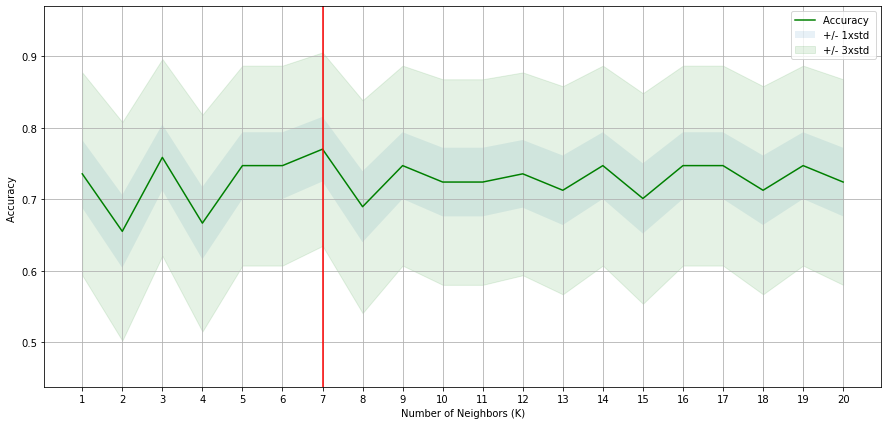

In [24]:
# Let's plot the results
plt.figure(figsize = (15,7))

plt.plot(np.arange(1,Ks+1,1),mean_acc,'g')
plt.fill_between(np.arange(1,Ks+1,1),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(np.arange(1,Ks+1,1),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")

#Let's get the max/min values to scale the visualization correctly
#xmin,xmax = plt.gca().get_xlim()
ymin,ymax = plt.gca().get_ylim()

plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.xticks(np.arange(1,Ks+1,1))

#The vline places at the maximum value of the mean accuracy
plt.vlines(Kmax,0,1,color = 'r')

#plt.xlim((xmin-(xmax-xmin)*.1),(xmax+(xmax-xmin)*.1))
plt.ylim((ymin-(ymax-ymin)*.1),(ymax+(ymax-ymin)*.1))

plt.grid()
plt.show()

So $k = 7$ is the optimum value.

Now we can re-train the model using the whole dataset

In [25]:
modelKNN = KNeighborsClassifier(n_neighbors=Kmax)
modelKNN.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

# Decision Tree


In [26]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [27]:
#Using the same train_test split

#Creating model and fitting
modelTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
modelTree.fit(x_train,y_train)

# predicting test samples
predTree = modelTree.predict(x_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6436781609195402


mehh... not a good model...

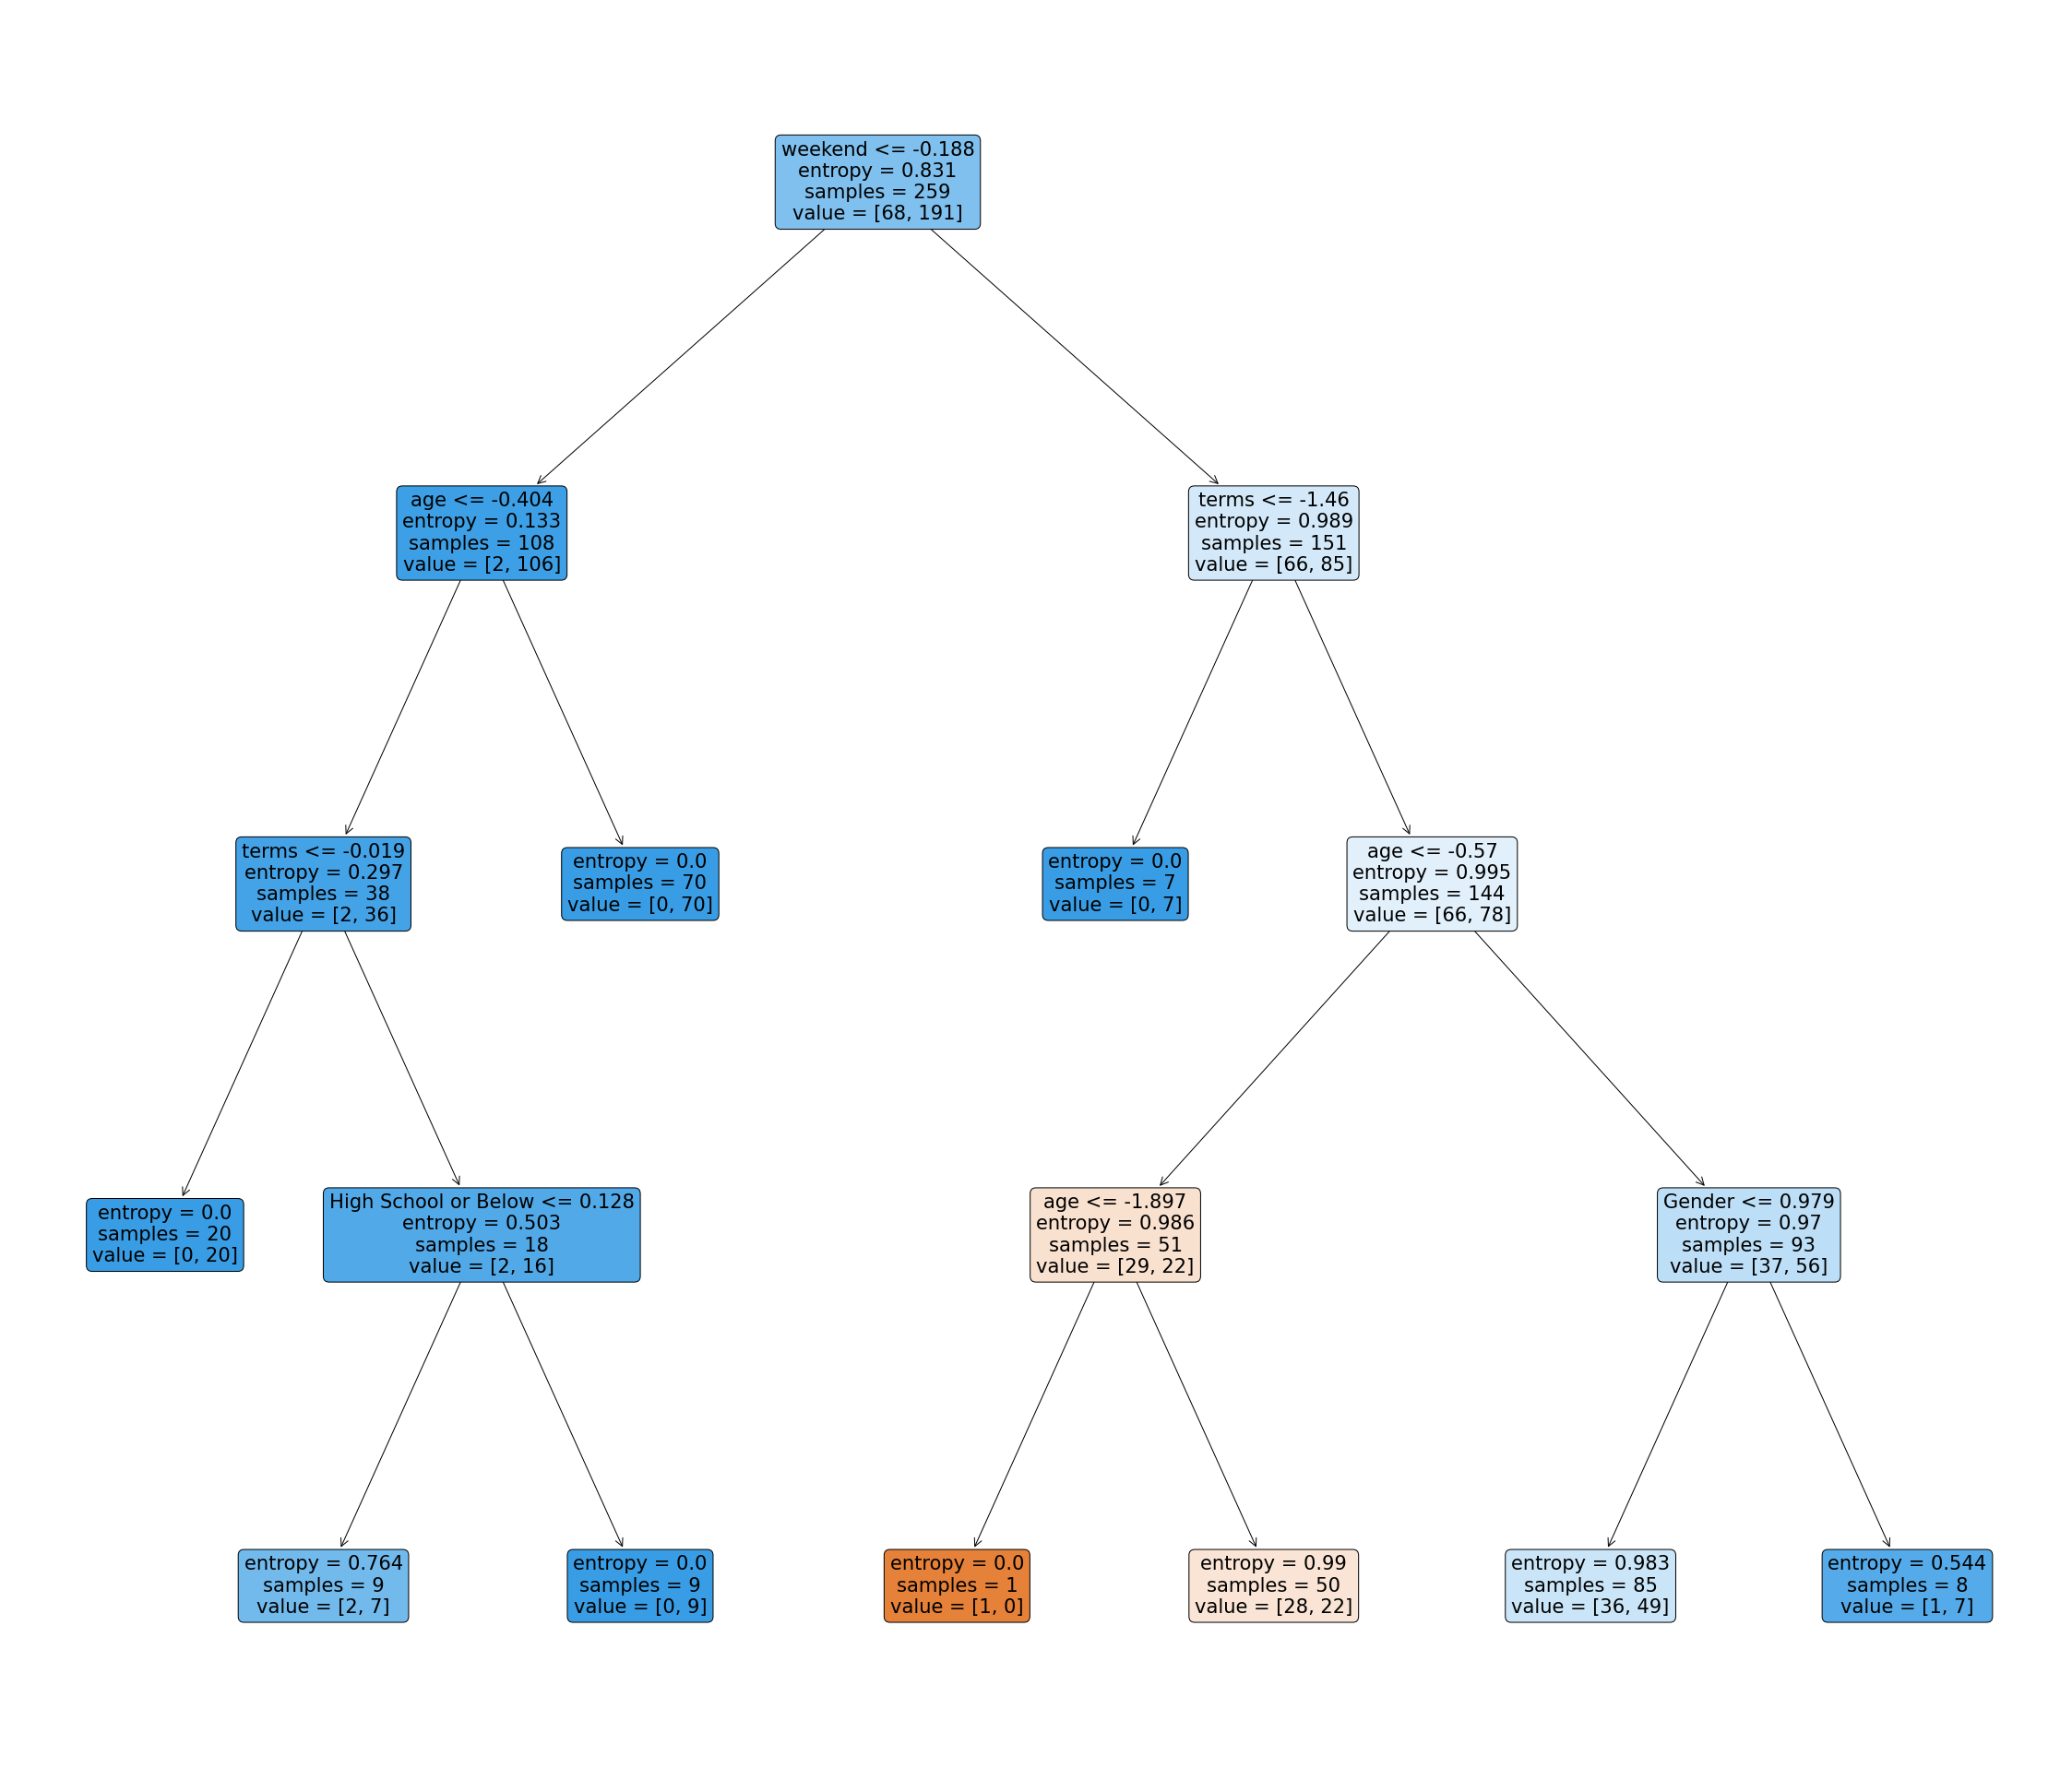

In [28]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize = (40,35))
tree.plot_tree(modelTree,ax = ax1,filled=True,feature_names=Feature.columns,rounded = True)
plt.show()

In [29]:
modelTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
modelTree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Support Vector Machine


I'm going to re-use the plot confusion matrix provided in the labs

In [30]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
modelSVM = svm.SVC(C = 10,kernel='rbf')
modelSVM.fit(x_train, y_train) 
yhat = modelSVM.predict(x_test)

Let's check the **confusion matrix** and the **report**

In [32]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

  COLLECTION       0.29      0.28      0.29        18
     PAIDOFF       0.81      0.83      0.82        69

    accuracy                           0.71        87
   macro avg       0.55      0.55      0.55        87
weighted avg       0.71      0.71      0.71        87



Confusion matrix, without normalization
[[ 5 13]
 [12 57]]


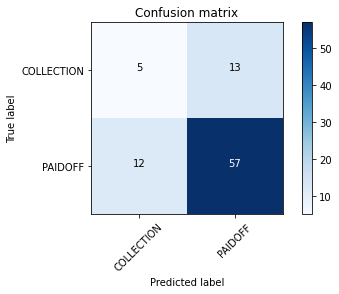

In [33]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=['COLLECTION','PAIDOFF'])
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

Humm... only fairly accurate for the paidoff status ... a lot of false collection labels predicted as paidoff...

**not good for bussiness** 

In [34]:
modelSVM = svm.SVC(C = 10,kernel='rbf')
modelSVM.fit(X,y) 

SVC(C=10)

# Logistic Regression


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [36]:
modelLR = LogisticRegression(C = 15,solver='liblinear')

In [37]:
modelLR.fit(x_train, y_train) 

LogisticRegression(C=15, solver='liblinear')

In [38]:
yhatLR = modelLR.predict(x_test)
print(classification_report(y_test,yhatLR))

              precision    recall  f1-score   support

  COLLECTION       0.14      0.11      0.12        18
     PAIDOFF       0.78      0.83      0.80        69

    accuracy                           0.68        87
   macro avg       0.46      0.47      0.46        87
weighted avg       0.65      0.68      0.66        87



Confusion matrix, without normalization
[[ 2 16]
 [12 57]]


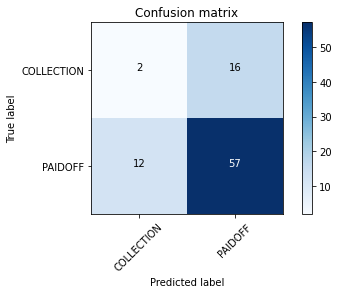

In [39]:
cnf_matrix = confusion_matrix(y_test, yhatLR,labels = ['COLLECTION','PAIDOFF'] )
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

Again... poor fitting done by this model ...

In [40]:
modelLR = LogisticRegression(C = 15,solver='liblinear')
modelLR.fit(X, y) 

LogisticRegression(C=15, solver='liblinear')

# Model Evaluation using Test set


In [41]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [42]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-25 20:25:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-08-25 20:25:14 (79.7 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [43]:
test_df = pd.read_csv('loan_test.csv')
test_df.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male


Obviously, we have to do the same pre-processing proceedure for this test dataset as we did for the train dataset...

In [44]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head(2)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0


In [45]:
Xtest = test_Feature.copy()
Xtest = preprocessing.StandardScaler().fit_transform(Xtest)

ytest = test_df['loan_status'].copy().values

And now, let's evaluate the models built

### KNN evaluation

I'm going to use the weighted average scores in every single case ...

In [46]:
yhat = modelKNN.predict(Xtest)
# Jaccard - I'm computing it for the Collection label
knn_jacc = jaccard_score(ytest,yhat,average='weighted')
#F1-score
knn_f1 = f1_score(ytest,yhat,average='weighted')

print(f'For KNN, the evaluation metrics are:\nJaccard = {knn_jacc}\nF1-score = {knn_f1}')


For KNN, the evaluation metrics are:
Jaccard = 0.5730994152046783
F1-score = 0.7001989201477693


### Decision Tree evaluation

In [47]:
yhat = modelTree.predict(Xtest)
# Jaccard - I'm computing it for the Collection label
dt_jacc = jaccard_score(ytest,yhat,average='weighted')
#F1-score
dt_f1 = f1_score(ytest,yhat,average='weighted')

print(f'For D-Tree, the evaluation metrics are:\nJaccard = {dt_jacc}\nF1-score = {dt_f1}')


For D-Tree, the evaluation metrics are:
Jaccard = 0.6183006535947712
F1-score = 0.7283950617283951


### SVM evaluation

In [48]:
yhat = modelSVM.predict(Xtest)
# Jaccard - I'm computing it for the Collection label
svm_jacc = jaccard_score(ytest,yhat,average='weighted')
#F1-score
svm_f1 = f1_score(ytest,yhat,average='weighted')

print(f'For SVM, the evaluation metrics are:\nJaccard = {svm_jacc}\nF1-score = {svm_f1}')


For SVM, the evaluation metrics are:
Jaccard = 0.5973266499582289
F1-score = 0.7253086419753088


### Log Reg evaluation

In [49]:
yhat = modelLR.predict(Xtest)
# Jaccard - I'm computing it for the Collection label
lr_jacc = jaccard_score(ytest,yhat,average='weighted')
#F1-score
lr_f1 = f1_score(ytest,yhat,average='weighted')

In order to have a log loss metric measured, we need numerical prediction values

In [50]:
yhat = pd.Series(yhat)
ytest2 = pd.Series(ytest.copy())
ytest2.replace(['COLLECTION','PAIDOFF'],[1,0],inplace = True)
yhat.replace(['COLLECTION','PAIDOFF'],[1,0],inplace = True)

In [51]:
#logloss
lr_logloss = log_loss(ytest2.values,yhat.values)

print(f'For Logistic Regression, the evaluation metrics are:\nJaccard = {lr_jacc}\nF1-score = {lr_f1}')
print(f'LogLoss = {lr_logloss}')

For Logistic Regression, the evaluation metrics are:
Jaccard = 0.5775681341719078
F1-score = 0.6717642373556352
LogLoss = 8.31489061358961


Log loss is aweful... so the logistic regression model is working very poorly

### We can create a dataframe to hold the scores and display them

In [52]:
dfdict = {'Algorithm':['KNN','Decision Tree','SVM','LogisticRegression'],\
          'Jaccard':[knn_jacc,dt_jacc,svm_jacc,lr_jacc],\
          'F1-score':[knn_f1,dt_f1,svm_f1,lr_f1],\
          'LogLoss':[np.nan,np.nan,np.nan,lr_logloss]}

scoredf = pd.DataFrame(dfdict)
scoredf.set_index('Algorithm',inplace=True)
scoredf

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.573099,0.700199,NaN
Decision Tree,0.618301,0.728395,NaN
SVM,0.597327,0.725309,NaN
LogisticRegression,0.577568,0.671764,8.314891


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.526       | 0.645        | NA      |
| Decision Tree      | 0.618       | 0.728        | NA      |
| SVM                | 0.597       | 0.725        | NA      |
| LogisticRegression | 0.578       | 0.671        | 8.315       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
